<a href="https://colab.research.google.com/github/Tonyz4516/detector-for-masked-faces/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q tf-nightly
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install opencv-python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/My\ Drive/5500_Project/baidu

agedb_30_masked.rar	lfw_masked.rar
CASIA-WebFace-mask.rar	masked_whn.rar
cfp_fp_masked.rar	self-built-masked-face-recognition-dataset.zip


In [4]:
%%capture
# masked whn is the 3rd, real world masked face
! unrar x drive/My\ Drive/5500_Project/baidu/masked_whn.rar drive/My\ Drive/5500_Project/face_masks/

# following 4 are simulated faces
# ! unrar x drive/My\ Drive/5500_Project/baidu/agedb_30_masked.rar drive/My\ Drive/5500_Project/face_masks/
# ! unrar x drive/My\ Drive/5500_Project/baidu/CASIA-WebFace-mask.rar drive/My\ Drive/5500_Project/face_masks/
# ! unrar x drive/My\ Drive/5500_Project/baidu/cfp_fp_masked.rar drive/My\ Drive/5500_Project/face_masks/
# ! unrar x drive/My\ Drive/5500_Project/baidu/lfw_masked.rar drive/My\ Drive/5500_Project/face_masks/

In [ ]:
%%capture
# note: took 13 mins to run

# this is the first folder we loaded: real world masked faces
! unzip drive/My\ Drive/5500_Project/baidu/self-built-masked-face-recognition-dataset.zip -d drive/My\ Drive/5500_Project/face_masks/

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [7]:
import os
import cv2 as cv

In [10]:
os.listdir("drive/My Drive/5500_Project/face_masks/")

['agedb_30_masked', 'masked_whn', 'self-built-masked-face-recognition-dataset']

In [13]:
folder = "drive/My Drive/5500_Project/face_masks/self-built-masked-face-recognition-dataset/"

In [14]:
# show the first 10 people
os.listdir(folder + "AFDB_masked_face_dataset")[:10]

['aidai',
 'anhu',
 'aoziyi',
 'axin',
 'baibaihe',
 'baijingting',
 'baike',
 'baobeier',
 'baojianfeng',
 'benxi']

In [15]:
def augment(img, path, file):
    
    flip = tf.image.flip_left_right(img)
    gray = tf.image.rgb_to_grayscale(img)
    red = tf.image.adjust_hue(img,0.9)
    green = tf.image.adjust_hue(img, 0.3)
    yellow = tf.image.adjust_hue(img, 0.1)
    flip_gray = tf.image.rgb_to_grayscale(flip)
    flip_red = tf.image.adjust_hue(flip,0.9)
    flip_green = tf.image.adjust_hue(flip,0.3)
    flip_yellow = tf.image.adjust_hue(flip,0.1)
    au_img = [flip, gray, red, green, yellow, flip_gray, flip_red, flip_green, flip_yellow]
    au_name = ["flip", "gray", "red", "green", "yellow", "flip_gray", "flip_red", "flip_green",
               "flip_yellow"]
    for idx, image in enumerate(au_img):
        tf.keras.preprocessing.image.save_img(path + file + "_%s.jpg"%au_name[idx], image, data_format= "channels_last")
    
    

In [16]:
subfolders = os.listdir(folder + "AFDB_masked_face_dataset")
sub_ls = subfolders
for subfolder in sub_ls:
    files = os.listdir(folder + "AFDB_masked_face_dataset/" +  subfolder)
    ls = files
    path = folder + "AFDB_masked_face_dataset/" +  subfolder +"/"
    for file in ls:    
        img = cv.imread(path + file)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        augment(img, path,file)

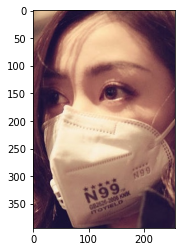

In [17]:
img = cv.imread(folder + "AFDB_masked_face_dataset/aidai/0_0_0.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)